
# Obtaining and Understanding Data

## Importing Libraries

In [124]:
#Downloading the required version of plotly for graphs
!pip install plotly==4.8.2

In [125]:
#Importing the requied packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
import time
from pandas import Grouper
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

## Loading dataframe

In [126]:
#Reading the data file
ks18 = pd.read_csv('ks-projects-201801.csv', encoding="ISO-8859-1", low_memory=False)
ks18.sample(15)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
212701,2084115444,Year 2150,Animation,Film & Video,EUR,2017-04-10,7000.0,2017-02-09 15:03:32,117.0,failed,3,AT,0.00,124.37,7441.03
187038,1952194876,Gathering of Guardians: The Board Game,Tabletop Games,Games,USD,2015-06-22,10000.0,2015-05-15 03:12:03,2370.0,failed,44,US,2370.00,2370.00,10000.00
292407,55814260,"The ""REBORN From Above"" Online Staged Film.",Romance,Film & Video,USD,2017-09-19,4000.0,2017-07-21 19:03:29,51.0,failed,2,US,1.00,51.00,4000.00
20536,1104312739,Twin city craft and flea market,Crafts,Crafts,USD,2016-01-13,20000.0,2015-12-14 22:02:38,0.0,failed,0,US,0.00,0.00,20000.00
345219,828554065,Revelin Project's debut EP 'The Dream',Rock,Music,USD,2014-05-11,2500.0,2014-04-11 18:00:20,2555.0,successful,44,US,2555.00,2555.00,2500.00
90727,1461097573,Baked on Browniesâ¢ (Canceled),Apparel,Fashion,USD,2014-08-18,12420.0,2014-07-04 05:59:34,1.0,canceled,1,US,1.00,1.00,12420.00
8146,1041168295,Conjure Your World,Mobile Games,Games,USD,2016-12-27,40000.0,2016-11-12 06:16:50,0.0,failed,0,US,0.00,0.00,40000.00
16247,1082240373,Mit dem Fahrrad um die Welt,Nature,Photography,EUR,2015-08-18,75000.0,2015-06-19 08:12:24,59.0,failed,3,DE,67.01,66.56,84607.14
271934,453557085,Maydan â Tactical board game,Tabletop Games,Games,GBP,2014-12-11,16000.0,2014-11-11 01:26:08,665.0,failed,20,GB,1054.73,1044.69,25135.50
139769,1709862378,Gobby - The card game that's a GOB full of FUN!,Tabletop Games,Games,AUD,2016-08-14,10000.0,2016-07-09 23:57:12,10000.0,successful,218,AU,2126.33,7613.25,7613.25


## Basic Information of Data

In [127]:
#Checking original shape of the dataframe 
ks18.shape

(378661, 15)

In [128]:
#Checking Columns of the dataframe
ks18.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

In [129]:
#Displaying information of the dataset
ks18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


# Data Visualisation

In [130]:
#Creating a df for generating graph
df_state = ks18[ks18['state'].isin(['failed', 'successful'])]
df_state.sample(5)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
219899,2120053310,StarLife - A 4x Turn-Based Space Strategy Indi...,Video Games,Games,USD,2011-08-26,2000.0,2011-07-27 01:15:51,527.0,failed,23,US,527.00,527.00,2000.00
275148,470004813,HELL - A Sex Shop Comedy,Comedy,Film & Video,GBP,2015-09-21,7800.0,2015-08-23 19:19:56,8049.0,successful,107,GB,12632.08,12215.63,11837.73
377615,994778294,Guazapa Chocolate,Farms,Food,USD,2015-03-06,3000.0,2015-02-04 23:18:25,220.0,failed,6,US,220.00,220.00,3000.00
326758,734306238,ReminiSens Restaurant & Theatre in Versailles,Plays,Theater,EUR,2017-04-07,10000.0,2017-03-08 18:15:03,127.0,failed,6,FR,91.00,135.00,10630.04
135023,1685383859,"Memoirs of a Dilettante, Volume One",Fiction,Publishing,CAD,2014-03-22,1000.0,2014-02-20 21:00:57,1354.0,successful,50,CA,1236.70,1226.67,905.96


In [131]:
#Extracting the year of the deadline and launched column
df_state['deadline_year'] = pd.DatetimeIndex(df_state['deadline']).year
df_state['launched_year'] = pd.DatetimeIndex(df_state['launched']).year
df_state.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,deadline_year,launched_year
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,2015,2015
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,2017,2017
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,2013,2013
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,2012,2012
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US,52375.0,52375.0,50000.00,2016,2016


In [132]:
#Converting the datatype of deadline and launched column
df_state['deadline'] = pd.to_datetime(df_state['deadline'])
df_state['launched'] = pd.to_datetime(df_state['launched'])

#Generating the difference of deadline and launched
df_state['launch_to_deadline'] =  df_state['deadline'] - df_state['launched'] 
df_state.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,deadline_year,launched_year,launch_to_deadline
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,2015,2015,58 days 11:47:32
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,2017,2017,59 days 19:16:03
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,2013,2013,44 days 23:39:10
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,2012,2012,29 days 20:35:49
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US,52375.0,52375.0,50000.00,2016,2016,34 days 10:21:33


In [133]:
#Writing the dataframe into csv
df_state.to_csv('df_state_days.csv')

In [134]:
#Reading the data
df_state_days = pd.read_excel('df_state_days.xlsx')
df_state_days.head()

,Unnamed: 0,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,deadline_year,launched_year,launch_to_deadline_days
0,0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,2015,2015,58
1,1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,2017,2017,59
2,2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,2013,2013,44
3,3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,2012,2012,29
4,5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US,52375.0,52375.0,50000.00,2016,2016,34


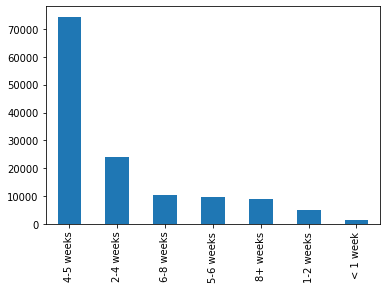

In [135]:
#Plot for number of projects based on duration
def return_week_bins(val):
    if val < 7:
        return "< 1 week"
    elif val < 14:
        return "1-2 weeks"
    elif val < 28:
        return "2-4 weeks"
    elif val < 35:
        return "4-5 weeks"
    elif val < 42:
        return "5-6 weeks"
    elif val < 56:
        return "6-8 weeks"
    else:
        return "8+ weeks"

successful_state_series = df_state_days[df_state_days['state'] == "successful"]['launch_to_deadline_days']
successful_state_series.map(return_week_bins).value_counts().plot(kind='bar')

<Figure size 1440x1440 with 0 Axes>

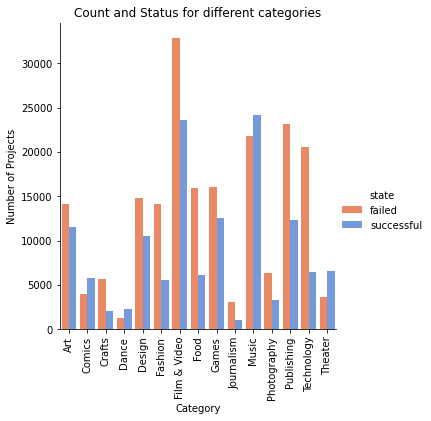

In [136]:
#Plotting a graph for checking number of projects in each category which are successful or failed
plt.figure(figsize=(20,20))
sns.catplot(x='main_category', hue='state', kind='count', data=df_state.sort_values('main_category'), palette=sns.color_palette(['coral','cornflowerblue']))
plt.xticks(rotation = 90)
plt.title("Count and Status for different categories")
plt.xlabel('Category')
plt.ylabel('Number of Projects')
plt.show()

In [137]:
#Graph for displaying information about each category based on country
px.sunburst(ks18, values= 'usd_pledged_real' , path = ["country","main_category"], 
            color_continuous_scale='RdBu',width=750, height=750,title="USD Pledged Amount Per Category Per Country")

In [138]:
#Converting the datatype of the launched column
df_state.launched = pd.to_datetime(df_state.launched)
df_state['launched(y)']=pd.to_datetime(df_state.launched).dt.year 

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



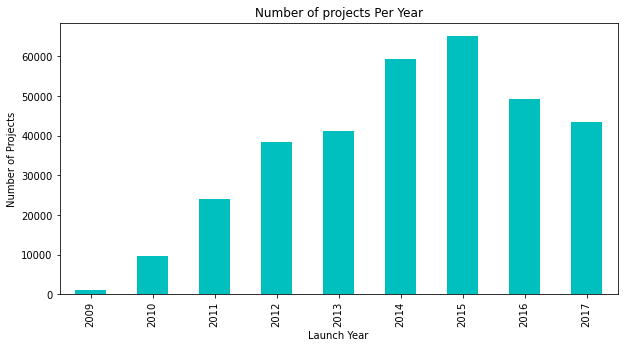

In [139]:
#Plotting project count against the years
plt.figure(figsize=(10,5))
df_state.groupby("launched(y)").main_category.count().plot(kind = 'bar', color = 'c')
plt.title("Number of projects Per Year")
plt.ylabel('Number of Projects')
plt.xlabel('Launch Year')
plt.show()

In [140]:
#Getting the count based on state
successful_kickstarter = df_state_days[df_state_days['state'] == "successful"]
failed_kickstarter = df_state_days[df_state_days['state'] == "failed"]
cancelled_kickstarter = df_state_days[df_state_days['state'] == "canceled"]
print(len(successful_kickstarter)," successful campaigns")
print(len(failed_kickstarter)," failed campaigns")
print(len(cancelled_kickstarter)," cancelled campaigns")

133956  successful campaigns
197719  failed campaigns
0  cancelled campaigns


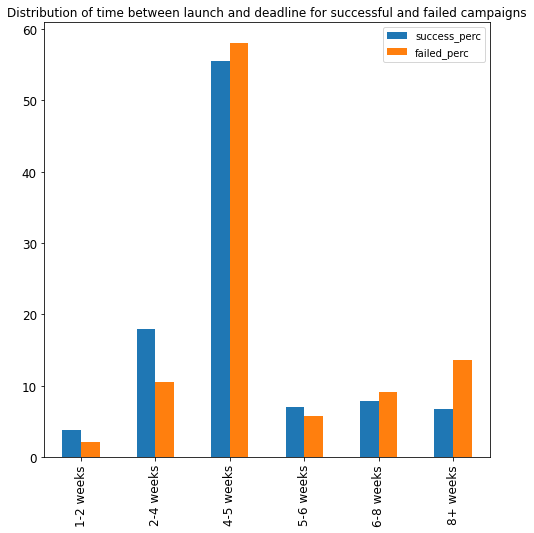

In [141]:
#Plot for Distribution of time between launch and deadline for successful and failed campaigns
n = 'launch_to_deadline_days'
compare_L2D = pd.concat([df_state_days[n].apply(return_week_bins).value_counts(),successful_kickstarter[n].apply(return_week_bins).value_counts(),failed_kickstarter[n].apply(return_week_bins).value_counts()], axis=1)
compare_L2D.columns = ['all','successful','failed']
compare_L2D.loc['total'] = compare_L2D.sum(axis=0)

def get_perc(val, col):
    return (float(val) / float(compare_L2D[col]['total']))*100

compare_L2D['all_perc'] = compare_L2D['all'].apply(get_perc, args=('all',))
compare_L2D['success_perc'] = compare_L2D['successful'].apply(get_perc, args=('successful',))
compare_L2D['failed_perc'] = compare_L2D['failed'].apply(get_perc, args=('failed',))
#compare_L2D['cancelled_perc'] = compare_L2D['cancelled'].apply(get_perc, args=('cancelled',))

compare_L2D[['success_perc','failed_perc']][:6].sort_index().plot(kind='bar', figsize=(8,8))
plt.xticks(size = 12 )
plt.yticks(size = 12 )
plt.title("Distribution of time between launch and deadline for successful and failed campaigns", fontdict = {'fontsize' : 12})
plt.show()


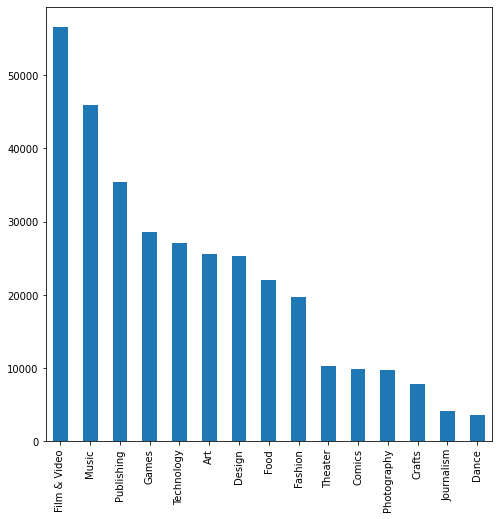

In [142]:
#Plot for project count based on main category
df_state_days['main_category'].value_counts().plot(kind = 'bar', figsize=(8,8))

# Data preprocessing

## Checking Null Values

In [143]:
# Checking for null values in all the columns
ks18.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [144]:
# Checking null values in 'name' column
ks18[ks18['name'].isnull()]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
166851,1848699072,NaN,Narrative Film,Film & Video,USD,2012-02-29,200000.0,2012-01-01 12:35:31,100.0,failed,1,US,100.00,100.00,200000.00
307234,634871725,NaN,Video Games,Games,GBP,2013-01-06,2000.0,2012-12-19 23:57:48,196.0,failed,12,GB,317.73,316.05,3224.97
309991,648853978,NaN,Product Design,Design,USD,2016-07-18,2500.0,2016-06-18 05:01:47,0.0,suspended,0,US,0.00,0.00,2500.00
338931,796533179,NaN,Painting,Art,USD,2011-12-05,35000.0,2011-11-06 23:55:55,220.0,failed,5,US,220.00,220.00,35000.00


## Filling Null Values

In [145]:
#Filling the null values with Dummy name
ks18['name'].fillna('Dummy', inplace = True)

In [146]:
#Rechecking the null values
ks18.isnull().sum()

ID                     0
name                   0
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

First, we considered to separate the values based on usd pledged column but then in the end we dropped this column, Since, the corrected values are presened in the usd_pledged_real column. Therefore, commenting the code

In [147]:
# #Checking null values in 'usd pledged' column
# df_usd_pl_null = ks18[ks18['usd pledged'].isnull()]
# df_usd_pl_null

In [148]:
# df_usd_pl_null[df_usd_pl_null.state != 'undefined']

In [149]:
# df_usd_pl_not_null = ks18[~ks18['usd pledged'].isnull()]

In [150]:
# df_usd_pl_not_null.isnull().sum()

In [151]:
# df_usd_pl_not_null.dtypes

In [152]:
# df_usd_pl_not_null[df_usd_pl_not_null['usd pledged'] != df_usd_pl_not_null['usd_pledged_real']].sample(10)

## Droppping Unnecessary Columns

In [153]:
# Droppping columns = 'name' & 'category' 
# Dropping 'usd pledged' as the correct data is recorded in 'usd_pledged_real'
 
ks18.drop(columns=['ID','name','category','usd pledged','currency','goal','pledged'], axis = 1, inplace = True)

In [154]:
#Printing the sample of the dataframe
ks18.sample(10)

,main_category,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real
21468,Film & Video,2012-10-31,2012-10-02 00:20:53,canceled,0,US,0.00,5000.00
12484,Theater,2016-08-05,2016-07-07 13:41:19,failed,6,GB,106.55,1315.41
11903,Theater,2012-07-08,2012-06-08 13:58:59,successful,55,US,4229.00,4000.00
72045,Music,2015-11-06,2015-10-07 18:23:04,undefined,0,"N,0""",0.00,3259.20
178794,Art,2013-11-16,2013-10-22 10:02:18,failed,0,US,0.00,535000.00
80472,Art,2017-11-13,2017-10-17 02:34:16,failed,6,AU,211.27,2139.14
73345,Publishing,2014-04-18,2014-03-19 22:02:03,successful,19,US,655.00,550.00
214615,Food,2015-02-22,2015-01-23 19:35:57,failed,2,US,2.00,32000.00
84629,Games,2013-10-25,2013-09-25 18:12:24,failed,139,CA,5333.40,21076.83
272431,Food,2014-08-13,2014-07-14 19:49:58,failed,0,US,0.00,8000.00


In [155]:
#Crosschecking for null values
ks18.isnull().sum()

main_category       0
deadline            0
launched            0
state               0
backers             0
country             0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

## Cleaning the Target Variable

In [156]:
#Determing the unique values of state column
ks18.state.unique()

array(['failed', 'canceled', 'successful', 'live', 'undefined',
       'suspended'], dtype=object)

In [157]:
#Printing the shape of the dataframe
ks18.shape

(378661, 8)

In [158]:
# Discarding records for 'live', 'canceled', 'undefined', 'suspended' projects

ks18 = ks18[ks18['state'].isin(['failed', 'successful'])]
ks18.sample(10)

,main_category,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real
161479,Art,2016-05-20,2016-04-27 10:21:55,successful,57,GB,1704.52,1456.86
58542,Film & Video,2016-12-08,2016-11-08 21:00:49,failed,4,US,39.00,8000.00
223538,Food,2017-06-23,2017-05-24 08:40:55,failed,0,FR,0.00,11173.06
46134,Film & Video,2012-10-31,2012-10-01 01:40:01,successful,22,US,5130.00,5000.00
65279,Dance,2014-02-03,2014-01-04 11:13:53,failed,12,US,1026.00,4000.00
62005,Food,2014-12-16,2014-10-17 16:51:38,failed,4,US,100.00,25000.00
165854,Fashion,2014-10-13,2014-09-13 00:49:33,failed,1,US,60.00,32000.00
343229,Film & Video,2014-12-06,2014-11-06 00:21:50,successful,103,GB,12647.87,12567.75
199970,Games,2017-02-04,2017-01-05 16:04:04,successful,255,US,10523.00,10000.00
597,Food,2013-08-22,2013-07-23 18:18:09,successful,443,US,102937.00,100000.00


## Converting the Categorical Variables

In [159]:
#Assigning Successful as 1 and failed as 0
ks18 = ks18.assign(state_output = (ks18['state'] == 'successful').astype(int))
ks18

,main_category,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real,state_output
0,Publishing,2015-10-09,2015-08-11 12:12:28,failed,0,GB,0.0,1533.95,0
1,Film & Video,2017-11-01,2017-09-02 04:43:57,failed,15,US,2421.0,30000.00,0
2,Film & Video,2013-02-26,2013-01-12 00:20:50,failed,3,US,220.0,45000.00,0
3,Music,2012-04-16,2012-03-17 03:24:11,failed,1,US,1.0,5000.00,0
5,Food,2016-04-01,2016-02-26 13:38:27,successful,224,US,52375.0,50000.00,1
...,...,...,...,...,...,...,...,...,...
378654,Food,2017-04-19,2017-03-20 22:08:22,failed,4,US,154.0,6500.00,0
378657,Film & Video,2011-07-19,2011-06-22 03:35:14,failed,5,US,155.0,1500.00,0
378658,Film & Video,2010-08-16,2010-07-01 19:40:30,failed,1,US,20.0,15000.00,0
378659,Technology,2016-02-13,2016-01-13 18:13:53,failed,6,US,200.0,15000.00,0


In [160]:
#Dropping the converted column
ks18.drop(columns = ['state'], inplace = True)
ks18

,main_category,deadline,launched,backers,country,usd_pledged_real,usd_goal_real,state_output
0,Publishing,2015-10-09,2015-08-11 12:12:28,0,GB,0.0,1533.95,0
1,Film & Video,2017-11-01,2017-09-02 04:43:57,15,US,2421.0,30000.00,0
2,Film & Video,2013-02-26,2013-01-12 00:20:50,3,US,220.0,45000.00,0
3,Music,2012-04-16,2012-03-17 03:24:11,1,US,1.0,5000.00,0
5,Food,2016-04-01,2016-02-26 13:38:27,224,US,52375.0,50000.00,1
...,...,...,...,...,...,...,...,...
378654,Food,2017-04-19,2017-03-20 22:08:22,4,US,154.0,6500.00,0
378657,Film & Video,2011-07-19,2011-06-22 03:35:14,5,US,155.0,1500.00,0
378658,Film & Video,2010-08-16,2010-07-01 19:40:30,1,US,20.0,15000.00,0
378659,Technology,2016-02-13,2016-01-13 18:13:53,6,US,200.0,15000.00,0


In [161]:
#Label encoding the Country Column
country_encoder= LabelEncoder().fit(ks18['country'])
ks18['country'] = country_encoder.transform(ks18['country'])

#Label Encoding the Main Category Column
main_category_encoder= LabelEncoder().fit(ks18['main_category'])
ks18['main_category'] = main_category_encoder.transform(ks18['main_category'])

ks18.sample(10)

,main_category,deadline,launched,backers,country,usd_pledged_real,usd_goal_real,state_output
332926,8,2015-02-25,2015-01-21 20:02:41,2899,22,163118.84,15000.0,1
8025,10,2013-05-08,2013-04-08 19:08:45,38,22,2557.57,2000.0,1
38992,6,2013-03-11,2013-02-26 00:11:53,65,22,3925.00,1450.0,1
34078,8,2015-05-09,2015-04-09 11:13:10,5,22,663.00,5000.0,0
35015,12,2014-03-28,2014-02-21 01:51:05,3,22,105.00,7500.0,0
44251,10,2012-01-11,2011-12-10 08:12:25,104,22,5895.46,5000.0,1
84299,11,2013-08-04,2013-07-16 22:22:14,7,22,170.00,867.0,0
328879,9,2015-06-05,2015-06-01 23:21:20,0,22,0.00,4000.0,0
177490,7,2017-10-05,2017-09-02 01:47:41,4,22,350.00,1500.0,0
50482,7,2013-08-03,2013-07-08 04:19:08,256,22,30020.00,20000.0,1


In [162]:
#Parsing deadline and launched date for better results
ks18.deadline = pd.to_datetime(ks18.deadline)
ks18.launched = pd.to_datetime(ks18.launched)
#Number of days the campaign was running
ks18['duration(days)'] = (ks18['deadline'] - ks18.launched).dt.days 
#Deadline year of the campaign 
ks18['deadline(y)']=pd.to_datetime(ks18.deadline).dt.year 
#Deadline month of the campaign
ks18['deadline(m)']=pd.to_datetime(ks18.deadline).dt.month 
#Launched year of the campaign
ks18['launched(y)']=pd.to_datetime(ks18.launched).dt.year 
#Launched month of the campaign
ks18['launched(m)']=pd.to_datetime(ks18.launched).dt.month

In [163]:
#Dropping the parsed columns
ks18.drop(['deadline','launched'], axis = 1, inplace=True)
ks18

,main_category,backers,country,usd_pledged_real,usd_goal_real,state_output,duration(days),deadline(y),deadline(m),launched(y),launched(m)
0,12,0,9,0.0,1533.95,0,58,2015,10,2015,8
1,6,15,22,2421.0,30000.00,0,59,2017,11,2017,9
2,6,3,22,220.0,45000.00,0,44,2013,2,2013,1
3,10,1,22,1.0,5000.00,0,29,2012,4,2012,3
5,7,224,22,52375.0,50000.00,1,34,2016,4,2016,2
...,...,...,...,...,...,...,...,...,...,...,...
378654,7,4,22,154.0,6500.00,0,29,2017,4,2017,3
378657,6,5,22,155.0,1500.00,0,26,2011,7,2011,6
378658,6,1,22,20.0,15000.00,0,45,2010,8,2010,7
378659,13,6,22,200.0,15000.00,0,30,2016,2,2016,1


## Defining Dependent and Independent Variables

In [164]:
#Defining X as dataframe for Independent features
X = ks18.drop("state_output",axis=1)
#Defining y as Dependent Variable
y = ks18["state_output"] 

In [165]:
print(X)

        main_category  backers  country  ...  deadline(m)  launched(y)  launched(m)
0                  12        0        9  ...           10         2015            8
1                   6       15       22  ...           11         2017            9
2                   6        3       22  ...            2         2013            1
3                  10        1       22  ...            4         2012            3
5                   7      224       22  ...            4         2016            2
...               ...      ...      ...  ...          ...          ...          ...
378654              7        4       22  ...            4         2017            3
378657              6        5       22  ...            7         2011            6
378658              6        1       22  ...            8         2010            7
378659             13        6       22  ...            2         2016            1
378660              0       17       22  ...            8         2011      

In [166]:
print(y)

0         0
1         0
2         0
3         0
5         1
         ..
378654    0
378657    0
378658    0
378659    0
378660    0
Name: state_output, Length: 331675, dtype: int64


## Handling the Imbalance in the Data

In [167]:
#Using smote to balance the data
smt = SMOTE(random_state=0)
X_train_sm , y_train_sm = smt.fit_resample(X, y)

## Splitting the dataset into the Training set and Test set

In [168]:
#Splitting the dataset into train and test set with the ratio of 80:20

X_train, X_test, y_train, y_test = train_test_split(X_train_sm , y_train_sm, test_size = 0.2, random_state = 0)

In [169]:
print(X_train)

        main_category  backers  country  ...  deadline(m)  launched(y)  launched(m)
304928              6      316       22  ...            9         2010            8
106264             13        0        9  ...           11         2015            9
126876             10       45       22  ...           11         2014           10
230179             10       10       22  ...            1         2013           12
96953               6       12       22  ...           11         2013           10
...               ...      ...      ...  ...          ...          ...          ...
359783              2       52       22  ...            3         2013            2
358083              9      102       12  ...            7         2013            6
152315             10       10       22  ...            1         2011           11
117952             12        7       22  ...            3         2014            2
305711             12        1       22  ...           10         2014      

In [170]:
print(y_train)

304928    1
106264    0
126876    0
230179    0
96953     1
         ..
359783    1
358083    1
152315    0
117952    0
305711    0
Name: state_output, Length: 316350, dtype: int64


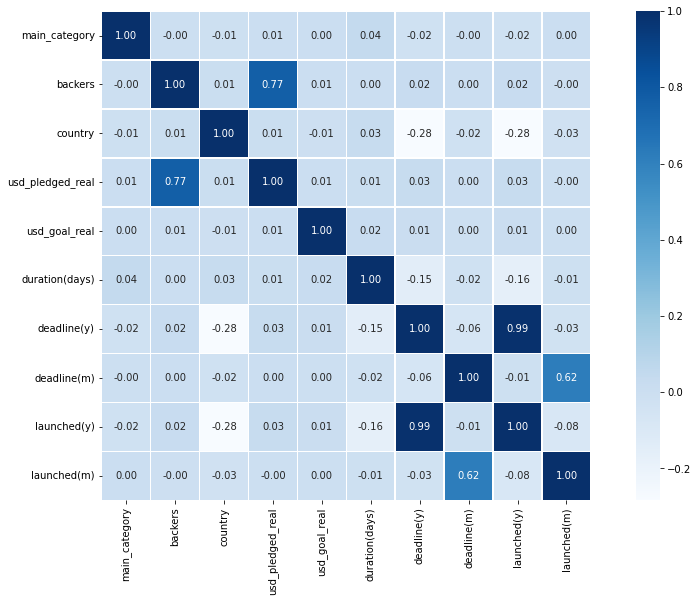

In [171]:
# Checking Correlations Heatmap for X_train variables
plt.subplots (figsize = (16,9))
sns.heatmap (X_train.corr(), square = True, cbar = True, annot = True, 
             annot_kws = {'size': 10}, fmt = '0.2f',linewidths=.5, cmap='Blues')
plt.show()

In [172]:
#Selecting the columns based on correlation values. Eleminating the columns with higher correlation
corr = X_train.corr()

columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

selected_columns = X_train.columns[columns]
selected_columns

Index(['main_category', 'backers', 'country', 'usd_pledged_real',
       'usd_goal_real', 'duration(days)', 'deadline(y)', 'deadline(m)',
       'launched(m)'],
      dtype='object')

In [173]:
#Selecting the columns which are required
X_train = X_train[selected_columns]
X_test = X_test[selected_columns]

In [174]:
X_train

,main_category,backers,country,usd_pledged_real,usd_goal_real,duration(days),deadline(y),deadline(m),launched(m)
304928,6,316,22,22553.000000,20000.000000,35,2010,9,8
106264,13,0,9,0.000000,12110.570000,44,2015,11,9
126876,10,45,22,2618.000000,9000.000000,36,2014,11,10
230179,10,10,22,370.000000,2500.000000,29,2014,1,12
96953,6,12,22,1520.000000,1000.000000,29,2013,11,10
...,...,...,...,...,...,...,...,...,...
359783,2,52,22,3392.673943,1228.177143,29,2013,3,2
358083,9,102,12,3295.206182,2397.789962,29,2013,7,6
152315,10,10,22,210.000000,900.000000,48,2012,1,11
117952,12,7,22,495.000000,7000.000000,29,2014,3,2


## Scaling the Features

In [175]:
# Applying feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [176]:
print(X_train)

[[-0.36427065  0.18458826  0.48288052 ... -2.18075288  0.71377661
   0.51673361]
 [ 1.45328245 -0.14201672 -1.6681572  ...  0.44922339  1.33246645
   0.82670382]
 [ 0.67433112 -0.09550652  0.48288052 ... -0.07677186  1.33246645
   1.13667403]
 ...
 [ 0.67433112 -0.13168112  0.48288052 ... -1.12876237 -1.76098274
   1.44664423]
 [ 1.193632   -0.1347818   0.48288052 ... -0.07677186 -1.1422929
  -1.34308763]
 [ 1.193632   -0.14098316  0.48288052 ... -0.07677186  1.02312153
   0.82670382]]


In [177]:
print(X_test)

[[ 0.67433112  0.06572885 -2.66094383 ...  0.44922339 -0.52360307
  -0.72314722]
 [ 0.67433112 -0.14098316  0.48288052 ... -0.07677186 -1.76098274
   1.75661444]
 [ 0.67433112 -0.13064756 -2.99187271 ...  0.97521864 -1.45163782
  -1.65305784]
 ...
 [-0.6239211  -0.13581536  0.48288052 ...  0.44922339  0.71377661
   0.51673361]
 [ 0.67433112 -0.1399496   0.48288052 ...  0.97521864 -0.21425815
  -0.41317701]
 [-0.36427065  0.03988985  0.48288052 ... -1.12876237 -0.83294799
  -1.03311742]]


# Model Implementation

## Decision Tree Model

In [178]:
#Checking the optimal number of parameters to avoid overfitting
param_grid = {
    "max_depth": [3,5,10,15,20,None],
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5]
}

clf = DecisionTreeClassifier(random_state=42)
grid_cv = GridSearchCV(clf, param_grid, scoring="roc_auc", n_jobs=-1, cv=3).fit(X_train, y_train)

print("Param for GS", grid_cv.best_params_)
print("CV score for GS", grid_cv.best_score_)
print("Train AUC ROC Score for GS: ", roc_auc_score(y_train, grid_cv.predict(X_train)))
print("Test AUC ROC Score for GS: ", roc_auc_score(y_test, grid_cv.predict(X_test)))

Param for GS {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
CV score for GS 0.9993019106864477
Train AUC ROC Score for GS:  0.9992983229806289
Test AUC ROC Score for GS:  0.9989248746654351


In [179]:
#Modeling with obtained parameters
dt_model = DecisionTreeClassifier(max_depth=10, min_samples_leaf=2)

#Fitting the Model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2)

In [180]:
#Predicting the test set values
y_pred_dt = dt_model.predict(X_test)

In [181]:
#Predicting the train set for calculating the accuracy
y_pred_train_dt = dt_model.predict(X_train)

In [182]:
# Confusion Matrix for evaluating the model
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_dt))
print("Accuracy Score for Test Set: ",accuracy_score(y_test, y_pred_dt)) 

Confusion Matrix: 
 [[39454    68]
 [   23 39543]]
Accuracy Score for Test Set:  0.9988493829658103


In [183]:
#Printing the accuracy for the training data
print("Accuracy Score for Training Set: ",accuracy_score(y_train, y_pred_train_dt))

Accuracy Score for Training Set:  0.9993835941204362


In [184]:
#Calculating the mean squared error for training set
training_error = mean_squared_error(y_train, y_pred_train_dt)
training_error

0.0006164058795637743

In [185]:
#Calculating the mean squared error for test set
test_error = mean_squared_error(y_test, y_pred_dt)
test_error

0.0011506170341897633

## XG Boost

In [186]:
#Creating an object of XGBoost Classifier
xgbc = XGBClassifier()

#Fitting the model on the training set
xgbc.fit(X_train, y_train)

XGBClassifier()

In [187]:
#Predicting the test set
y_pred_xgb = xgbc.predict(X_test)

In [188]:
#Predicting for Training Set
y_pred_train_xgb = xgbc.predict(X_train)

In [189]:
# Confusion Matrix for evaluating the model
from sklearn.metrics import confusion_matrix, accuracy_score
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_xgb))
print("Accuracy Score for Test Set: ",accuracy_score(y_test, y_pred_xgb))  

Confusion Matrix: 
 [[38899   623]
 [   15 39551]]
Accuracy Score for Test Set:  0.9919330366174388


In [190]:
print("Accuracy Score for Training Set: ",accuracy_score(y_train, y_pred_train_xgb))

Accuracy Score for Training Set:  0.9923692113165797


## K-Nearest Neighbors

In [191]:
#Checking the optimal K value
error_rate = []
for i in range(1,15):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

Minimum error:- 0.1996257333603075 at K = 1


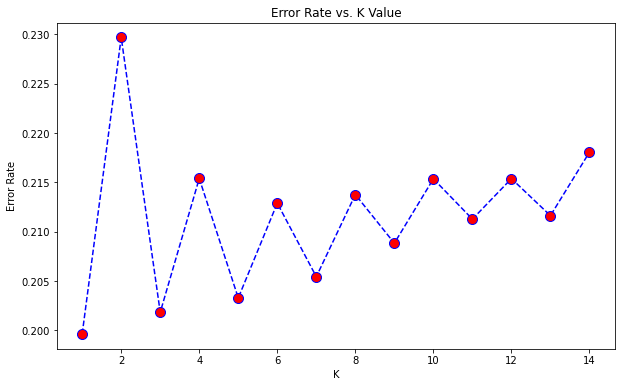

In [192]:
#Plotting the error rate for each K value
plt.figure(figsize=(10,6))
plt.plot(range(1,15),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
req_k_value = error_rate.index(min(error_rate))+1
print("Minimum error:-",min(error_rate),"at K =",req_k_value)

Commenting the code because it takes a lot of time.

In [193]:
# #List Hyperparameters to tune
# from sklearn.model_selection import GridSearchCV
# leaf_size = list(range(1,10))
# n_neighbors = list(range(1,15))
# p=[1,2]
# #convert to dictionary
# hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
# #Making model
# clf = GridSearchCV(knn, hyperparameters, cv=10)
# best_model = clf.fit(X_train,y_train)
# #Best Hyperparameters Value
# print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
# print('Best p:', best_model.best_estimator_.get_params()['p'])
# print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
# #Predict testing set
# y_pred = best_model.predict(X_test)
# #Check performance using accuracy
# print(accuracy_score(y_test, y_pred))
# #Check performance using ROC
# roc_auc_score(y_test, y_pred)

In [241]:
#Creating the Object for KNN
KNclassifier = KNeighborsClassifier(n_neighbors = 3)
#Fitting the data
KNclassifier.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [242]:
#Predicting the Test Set
y_pred_KN = KNclassifier.predict(X_test)

In [243]:
#Predicting the Train set
y_pred_train_KN = KNclassifier.predict(X_train)

In [244]:
# Confusion Matrix for evaluating the model
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_KN))
print("Accuracy Score for Test Set: ",accuracy_score(y_test, y_pred_KN))

Confusion Matrix: 
 [[31969  7553]
 [ 8409 31157]]
Accuracy Score for Test Set:  0.7981741857171758


In [245]:
#Printing accuracy for Training set
print("Accuracy Score for Training: ",accuracy_score(y_train, y_pred_train_KN))

Accuracy Score for Training:  0.8977967441125336


## Logistic Regression

In [199]:
#Using Logistic Regression
lr = LogisticRegression()

#Training the model
lr.fit(X_train, y_train)

LogisticRegression()

In [200]:
#Predicting the test set
y_pred_LR = lr.predict(X_test)

In [201]:
#Predicting the training set
y_pred_train_lr = lr.predict(X_train)

In [202]:
# Confusion Matrix for evaluating the model
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_LR))
print("Accuracy Score for Test Set: ",accuracy_score(y_test, y_pred_LR))

Confusion Matrix: 
 [[37367  2155]
 [ 4085 35481]]
Accuracy Score for Test Set:  0.9211005462269877


In [203]:
#Printing accuracy for training set
print("Accuracy Score for Training: ",accuracy_score(y_train, y_pred_train_lr))

Accuracy Score for Training:  0.9215868500079026


## Random Forest Regression

In [204]:
#Using Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [205]:
#Predicting the values for test set
y_pred_rf = random_forest.predict(X_test)

In [206]:
#Predicting for train set
y_pred_train_rf = random_forest.predict(X_train)

In [207]:
#Confusion Matrix for evaluating the model
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_rf))
print("Accuracy Score for Test Set: ",accuracy_score(y_test, y_pred_rf))

Confusion Matrix: 
 [[39386   136]
 [    2 39564]]
Accuracy Score for Test Set:  0.9982551082338661


In [208]:
#Printing accuracy for training set
print("Accuracy Score for Training: ",accuracy_score(y_train, y_pred_train_rf))

Accuracy Score for Training:  0.9999968389442073


## Naive Bayes Classifier 

In [209]:
#Using Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [211]:
#Predicting the values for testing set
y_pred_nb = nb.predict(X_test)

In [214]:
#Predicting the values for train set
y_pred_train_nb = nb.predict(X_train)

In [212]:
#Confusion Matrix for evaluating the model
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_nb))
print("Accuracy Score: ",accuracy_score(y_test, y_pred_nb))  

Confusion Matrix: 
 [[38776   746]
 [25777 13789]]
Accuracy Score:  0.664639389034999


In [215]:
#Printing accuracy for training set
print("Accuracy Score for Training: ",accuracy_score(y_train, y_pred_train_nb))

Accuracy Score for Training:  0.6654623044096728


## AdaBoost Classifier

In [216]:
#Creating an object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
abc.fit(X_train, y_train)


AdaBoostClassifier(learning_rate=1)

In [217]:
#Predict the response for test dataset
y_pred_abc = abc.predict(X_test)

In [218]:
#Predict the response for train dataset
y_pred_train_abc = abc.predict(X_train)

In [219]:
# Confusion Matrix for evaluating the model
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_abc))
print("Accuracy Score: ",accuracy_score(y_test, y_pred_abc))  

Confusion Matrix: 
 [[38139  1383]
 [  165 39401]]
Accuracy Score:  0.9804268662755412


In [220]:
#Printing accuracy for training set
print("Accuracy Score for Training: ",accuracy_score(y_train, y_pred_train_abc))

Accuracy Score for Training:  0.9807428481112692


## Support Vector Machine

Commented the code for SVM, as it takes time to execute.

In [221]:
# from sklearn.svm import SVC
# from sklearn.model_selection import cross_validate
# from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

In [222]:
# classifier = SVC(kernel = 'linear', random_state = 0)
# classifier.fit(X_train, y_train)
# y_pred = classifier.predict(X_test)

In [223]:
# SVM = SVC(probability = True)
# scoring = ['accuracy','precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
# scores = cross_validate(SVM, X_train, y_train, scoring=scoring, cv=20)

# sorted(scores.keys())
# SVM_fit_time = scores['fit_time'].mean()
# SVM_score_time = scores['score_time'].mean()
# SVM_accuracy = scores['test_accuracy'].mean()
# SVM_precision = scores['test_precision_macro'].mean()
# SVM_recall = scores['test_recall_macro'].mean()
# SVM_f1 = scores['test_f1_weighted'].mean()
# SVM_roc = scores['test_roc_auc'].mean()

# Evaluation Metrics

## Accuracy

In [224]:
print("Accuracy Score for KNN: ",accuracy_score(y_test, y_pred_KN))
print("Accuracy Score for Logistic Regression: ",accuracy_score(y_test, y_pred_LR))
print("Accuracy Score for AdaBoost Classifier: ",accuracy_score(y_test, y_pred_abc)) 
print("Accuracy Score for Decision Tree Classifier: ",accuracy_score(y_test, y_pred_dt)) 

Accuracy Score for KNN:  0.8003742666396925
Accuracy Score for Logistic Regression:  0.9211005462269877
Accuracy Score for AdaBoost Classifier:  0.9804268662755412
Accuracy Score for Decision Tree Classifier:  0.9988493829658103


## Confusion Matrix

In [225]:
#Function to calculate the confusion matrix and plot it for each model.

def get_conf_matrix(y_pred, model_name):
  conmat = confusion_matrix(y_test, y_pred)
  val = np.mat(conmat) 

  classnames = list(set(y_train))

  df_cm = pd.DataFrame(

          val, index=classnames, columns=classnames, 

      )

  print(df_cm)

  plt.figure()

  heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues")

  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')

  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

  plt.ylabel('True label')

  plt.xlabel('Predicted label')

  plt.title(model_name+' Model Results')

  plt.show()

       0      1
0  39454     68
1     23  39543


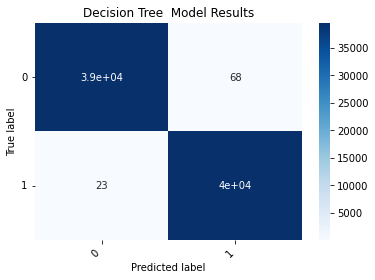

In [226]:
#Confusion Matrix for Decision Tree
get_conf_matrix(y_pred_dt, 'Decision Tree ')

       0      1
0  38139   1383
1    165  39401


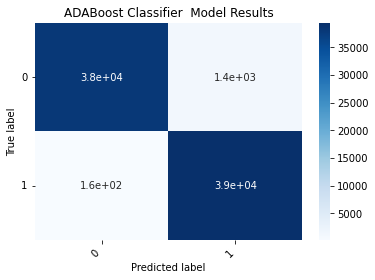

In [227]:
#Confusion Matrix for ADABoost Classifier
get_conf_matrix(y_pred_abc, 'ADABoost Classifier ')

       0      1
0  31980   7542
1   8246  31320


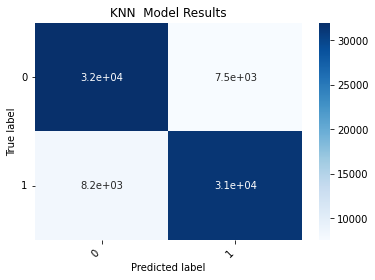

In [228]:
#Confusion Matrix for KNN
get_conf_matrix(y_pred_KN, 'KNN ')

       0      1
0  37367   2155
1   4085  35481


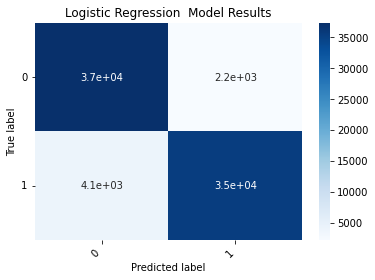

In [229]:
#Confusion Matrix for Logistic Regression
get_conf_matrix(y_pred_LR, 'Logistic Regression ')

## F1, Recall, Precision Score

In [232]:
#Function to get the different scores for each model
def get_scores(y_prediction):
  f1 = f1_score(y_test, y_prediction)
  recall = recall_score(y_test, y_prediction)
  precision = precision_score(y_test, y_prediction)
  return f1, recall, precision

In [233]:
#Scores for Decision Tree
f1_dt, recall_dt, precision_dt = get_scores(y_pred_dt)
print('For Decision Tree : \n')
print ('F1 score:',f1_dt )
print ('Recall:',recall_dt)
print ('Precision:', precision_dt)

For Decision Tree : 

F1 score: 0.9988506763327735
Recall: 0.9994186928170652
Precision: 0.998283305142511


In [234]:
#Scores for ADABoost Classifier
f1_abc, recall_abc, precision_abc = get_scores(y_pred_abc)
print('For Adaptive Boosting : \n')
print ('F1 score:',f1_abc )
print ('Recall:',recall_abc)
print ('Precision:', precision_abc)

For Adaptive Boosting : 

F1 score: 0.9807342874922216
Recall: 0.9958297528180762
Precision: 0.9660896429972539


In [235]:
#Scores for KNN
f1_KN, recall_KN, precision_KN = get_scores(y_pred_KN)
print('For KNN : \n')
print ('F1 score:',f1_KN)
print ('Recall:',recall_KN)
print ('Precision:', precision_KN)

For KNN : 

F1 score: 0.7986943438567858
Recall: 0.7915887378051862
Precision: 0.8059286706808708


In [236]:
#Scores for Logistic Regression
f1_LR, recall_LR, precision_LR = get_scores(y_pred_LR)
print('For Logistic Regression : \n')
print ('F1 score:',f1_LR)
print ('Recall:',recall_LR)
print ('Precision:', precision_LR)

For Logistic Regression : 

F1 score: 0.9191730784176576
Recall: 0.8967547894657029
Precision: 0.9427409926665958


## Plot for Accuracy

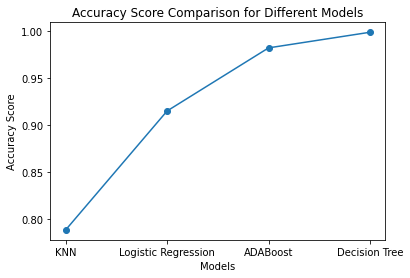

In [237]:
#Plot for Accuracy
x = ['KNN','Logistic Regression','ADABoost','Decision Tree']
y = [accuracy_KN,accuracy_LR,accuracy_abc,accuracy_dt]

plt.plot(x,y, marker = 'o' )
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score Comparison for Different Models')
plt.show()

## Plot for Precision

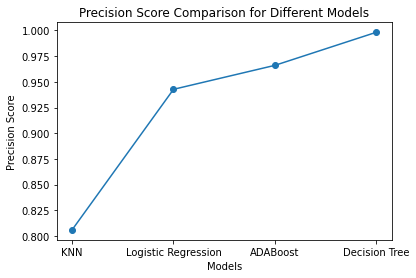

In [238]:
#Plot for Precision
x = ['KNN','Logistic Regression','ADABoost','Decision Tree']
y = [precision_KN, precision_LR, precision_abc, precision_dt]

plt.plot(x,y, marker = 'o' )
plt.xlabel('Models')
plt.ylabel('Precision Score')
plt.title('Precision Score Comparison for Different Models')
plt.show()

## Plot for Recall

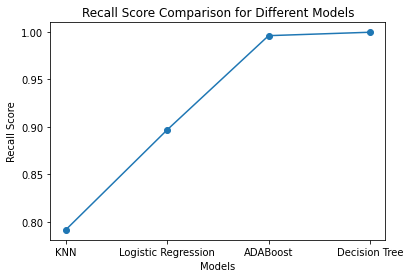

In [239]:
#Plot for Recall
x = ['KNN','Logistic Regression','ADABoost','Decision Tree']
y = [recall_KN, recall_LR, recall_abc, recall_dt]

plt.plot(x,y, marker = 'o' )
plt.xlabel('Models')
plt.ylabel('Recall Score')
plt.title('Recall Score Comparison for Different Models')
plt.show()

## Plot for F1 Score

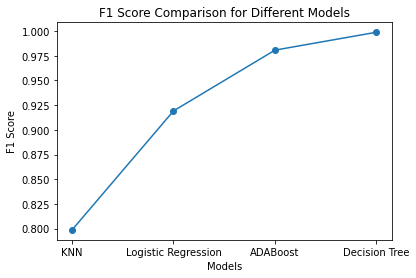

In [240]:
#Plot for F1
x = ['KNN','Logistic Regression','ADABoost','Decision Tree']
y = [f1_KN, f1_LR, f1_abc, f1_dt]

plt.plot(x,y, marker = 'o' )
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison for Different Models')
plt.show()